### Cleaning, prep and merging of the various data files

In [5]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cd C:\\Users\dansa\Documents\Github\Phase1\Data\CCD

C:\Users\dansa\Documents\Github\Phase1\Data\CCD


In [8]:
dframe = pandas.read_csv("ccd_DIRECTORY.csv")
dframe.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2017-2018,1,ALABAMA,AL,Albertville Middle School,Albertville City,1,NaN,AL-101,100005,...,No,No,No,No,No,No,07,08,Middle,As reported
1,2017-2018,1,ALABAMA,AL,Albertville High School,Albertville City,1,NaN,AL-101,100005,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
2,2017-2018,1,ALABAMA,AL,Evans Elementary School,Albertville City,1,NaN,AL-101,100005,...,No,No,No,No,No,No,05,06,Middle,As reported
3,2017-2018,1,ALABAMA,AL,Albertville Elementary School,Albertville City,1,NaN,AL-101,100005,...,No,No,No,No,No,No,03,04,Elementary,As reported
4,2017-2018,1,ALABAMA,AL,Big Spring Lake Kindergarten School,Albertville City,1,NaN,AL-101,100005,...,No,No,No,No,No,No,KG,KG,Elementary,As reported


In [9]:
dframe.dtypes

SCHOOL_YEAR           object
FIPST                  int64
STATENAME             object
ST                    object
SCH_NAME              object
LEA_NAME              object
STATE_AGENCY_NO        int64
UNION                float64
ST_LEAID              object
LEAID                  int64
ST_SCHID              object
NCESSCH                int64
SCHID                  int64
MSTREET1              object
MSTREET2              object
MSTREET3              object
MCITY                 object
MSTATE                object
MZIP                   int64
MZIP4                float64
LSTREET1              object
LSTREET2              object
LSTREET3              object
LCITY                 object
LSTATE                object
LZIP                   int64
LZIP4                float64
PHONE                 object
WEBSITE               object
SY_STATUS              int64
                      ...   
SCH_TYPE               int64
RECON_STATUS          object
OUT_OF_STATE_FLAG     object
CHARTER_TEXT  

In [10]:
dframe.shape

(102337, 65)

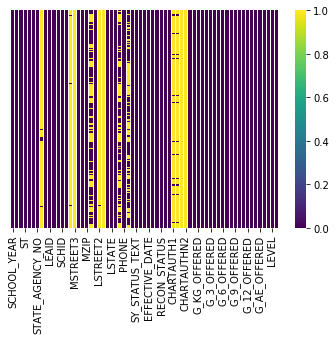

In [11]:
# Use heatmap to determine if there are missing data
sns.heatmap(dframe.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [12]:
dframe.isna().sum()

SCHOOL_YEAR               0
FIPST                     0
STATENAME                 0
ST                        0
SCH_NAME                  0
LEA_NAME                  0
STATE_AGENCY_NO           0
UNION                 99857
ST_LEAID                  0
LEAID                     0
ST_SCHID                  0
NCESSCH                   0
SCHID                     0
MSTREET1                  0
MSTREET2             100556
MSTREET3             102309
MCITY                     0
MSTATE                    0
MZIP                      0
MZIP4                 40487
LSTREET1                  2
LSTREET2             101729
LSTREET3             102326
LCITY                     0
LSTATE                    0
LZIP                      0
LZIP4                 42414
PHONE                     0
WEBSITE               45311
SY_STATUS                 0
                      ...  
SCH_TYPE                  0
RECON_STATUS              0
OUT_OF_STATE_FLAG         0
CHARTER_TEXT              0
CHARTAUTH1          

In [13]:
#dropping unwanted and entirely null columns
dframe.drop(dframe.columns[[1,2,7,14,15,19,21,22,26,39,40,41,42]], axis=1, inplace=True)

In [14]:
#dframe.shape

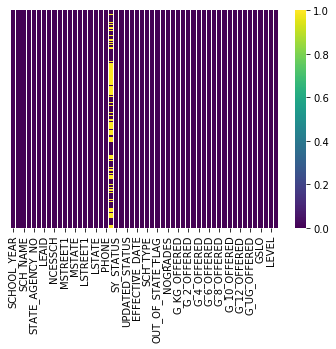

In [15]:
# Use heatmap to determine if there are missing data
sns.heatmap(dframe.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [34]:
#keeping only high schools
HS_df=dframe[dframe.LEVEL == "High"]

In [35]:
HS_df.head(10)

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,10000500871,100871,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
7,2017-2018,AL,Asbury High School,Marshall County,1,AL-048,100006,AL-048-0030,10000600872,100872,...,Yes,Yes,Yes,No,No,No,06,12,High,As reported
10,2017-2018,AL,Douglas High School,Marshall County,1,AL-048,100006,AL-048-0100,10000600878,100878,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
12,2017-2018,AL,Kate D Smith DAR High School,Marshall County,1,AL-048,100006,AL-048-0140,10000600883,100883,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
15,2017-2018,AL,Marshall Technical School,Marshall County,1,AL-048,100006,AL-048-0160,10000600987,100987,...,Yes,Yes,Yes,No,No,No,10,12,High,As reported
18,2017-2018,AL,Brindlee Mountain High School,Marshall County,1,AL-048,100006,AL-048-0042,10000601585,101585,...,Yes,Yes,Yes,No,No,No,06,12,High,As reported
24,2017-2018,AL,Hoover High School,Hoover City,1,AL-158,100007,AL-158-0400,10000700251,100251,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
28,2017-2018,AL,Spain Park High School,Hoover City,1,AL-158,100007,AL-158-0010,10000701456,101456,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
38,2017-2018,AL,Crossroads School,Hoover City,1,AL-158,100007,AL-158-3830,10000702359,102359,...,Yes,Yes,Yes,No,No,No,06,12,High,As reported
41,2017-2018,AL,Bob Jones High School,Madison City,1,AL-169,100008,AL-169-0080,10000800831,100831,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported


In [36]:
HS_df.shape

(23100, 52)

In [37]:
HS_df['NCESSCH'] = HS_df['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
HS_df.head()

C:\Users\dansa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,010000500871,100871,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
7,2017-2018,AL,Asbury High School,Marshall County,1,AL-048,100006,AL-048-0030,010000600872,100872,...,Yes,Yes,Yes,No,No,No,06,12,High,As reported
10,2017-2018,AL,Douglas High School,Marshall County,1,AL-048,100006,AL-048-0100,010000600878,100878,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
12,2017-2018,AL,Kate D Smith DAR High School,Marshall County,1,AL-048,100006,AL-048-0140,010000600883,100883,...,Yes,Yes,Yes,No,No,No,09,12,High,As reported
15,2017-2018,AL,Marshall Technical School,Marshall County,1,AL-048,100006,AL-048-0160,010000600987,100987,...,Yes,Yes,Yes,No,No,No,10,12,High,As reported


In [38]:
HS_df.shape

(23100, 52)

In [39]:
HS_df.astype({'NCESSCH': 'object'}).dtypes

SCHOOL_YEAR            object
ST                     object
SCH_NAME               object
LEA_NAME               object
STATE_AGENCY_NO         int64
ST_LEAID               object
LEAID                   int64
ST_SCHID               object
NCESSCH                object
SCHID                   int64
MSTREET1               object
MCITY                  object
MSTATE                 object
MZIP                    int64
LSTREET1               object
LCITY                  object
LSTATE                 object
LZIP                    int64
PHONE                  object
WEBSITE                object
SY_STATUS               int64
SY_STATUS_TEXT         object
UPDATED_STATUS          int64
UPDATED_STATUS_TEXT    object
EFFECTIVE_DATE         object
SCH_TYPE_TEXT          object
SCH_TYPE                int64
RECON_STATUS           object
OUT_OF_STATE_FLAG      object
CHARTER_TEXT           object
NOGRADES               object
G_PK_OFFERED           object
G_KG_OFFERED           object
G_1_OFFERE

In [40]:
HS_df.columns

Index(['SCHOOL_YEAR', 'ST', 'SCH_NAME', 'LEA_NAME', 'STATE_AGENCY_NO',
       'ST_LEAID', 'LEAID', 'ST_SCHID', 'NCESSCH', 'SCHID', 'MSTREET1',
       'MCITY', 'MSTATE', 'MZIP', 'LSTREET1', 'LCITY', 'LSTATE', 'LZIP',
       'PHONE', 'WEBSITE', 'SY_STATUS', 'SY_STATUS_TEXT', 'UPDATED_STATUS',
       'UPDATED_STATUS_TEXT', 'EFFECTIVE_DATE', 'SCH_TYPE_TEXT', 'SCH_TYPE',
       'RECON_STATUS', 'OUT_OF_STATE_FLAG', 'CHARTER_TEXT', 'NOGRADES',
       'G_PK_OFFERED', 'G_KG_OFFERED', 'G_1_OFFERED', 'G_2_OFFERED',
       'G_3_OFFERED', 'G_4_OFFERED', 'G_5_OFFERED', 'G_6_OFFERED',
       'G_7_OFFERED', 'G_8_OFFERED', 'G_9_OFFERED', 'G_10_OFFERED',
       'G_11_OFFERED', 'G_12_OFFERED', 'G_13_OFFERED', 'G_UG_OFFERED',
       'G_AE_OFFERED', 'GSLO', 'GSHI', 'LEVEL', 'IGOFFERED'],
      dtype='object')

In [41]:
HS_df.shape

(23100, 52)

In [45]:
#dropping unwanted and entirely null columns
HS_df_short=HS_df.drop(['PHONE', 'UPDATED_STATUS_TEXT','EFFECTIVE_DATE', 'RECON_STATUS', 'OUT_OF_STATE_FLAG', 'CHARTER_TEXT', 'NOGRADES', 'G_PK_OFFERED', 'G_KG_OFFERED', 'G_1_OFFERED', 'G_2_OFFERED', 'G_3_OFFERED', 'G_4_OFFERED', 'G_5_OFFERED', 'G_6_OFFERED', 'G_11_OFFERED', 'G_12_OFFERED', 'G_13_OFFERED', 'G_UG_OFFERED', 'G_AE_OFFERED', 'GSLO', 'GSHI', 'IGOFFERED'], axis = 1) 

In [46]:
HS_df_short.shape

(23100, 29)

In [47]:
HS_df_short.describe(include='object') #looking at some descriptives for my columns with object datatypes

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,ST_LEAID,ST_SCHID,NCESSCH,MSTREET1,MCITY,MSTATE,...,LCITY,LSTATE,WEBSITE,SY_STATUS_TEXT,SCH_TYPE_TEXT,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,LEVEL
count,23100,23100,23100,23100,23100,23100,23100,23100,23100,23100,...,23100,23100,13352,23100,23100,23100,23100,23100,23100,23100
unique,1,56,21468,11672,11876,23100,23100,20333,9425,55,...,9473,55,11009,8,4,2,2,2,2,1
top,2017-2018,CA,Central High School,Los Angeles Unified,CA-1964733,VA-057-0570190,291620000762,P O BOX 292730,Chicago,CA,...,Chicago,CA,http://www.houstonisd.org,Open,Regular School,No,No,Yes,Yes,High
freq,23100,2263,30,248,248,1,1,39,170,2265,...,170,2265,46,22688,18143,17919,17401,22092,22651,23100


In [50]:
cd C:\\Users\dansa\Documents\Github\Phase1\Data\CRDC

C:\Users\dansa\Documents\Github\Phase1\Data\CRDC


In [51]:
#pulling crdc data
crdc_school = pandas.read_csv('School_Characteristics.csv',encoding='cp1252')

C:\Users\dansa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
crdc_school.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_GRADE_UG,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9


In [53]:
crdc_school.shape

(97632, 32)

In [54]:
crdc_school.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG', 'SCH_GRADE_G01',
       'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04', 'SCH_GRADE_G05',
       'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08', 'SCH_GRADE_G09',
       'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12', 'SCH_GRADE_UG',
       'SCH_UGDETAIL_ES', 'SCH_UGDETAIL_MS', 'SCH_UGDETAIL_HS',
       'SCH_STATUS_SPED', 'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER',
       'SCH_STATUS_ALT', 'SCH_MAGNETDETAIL', 'SCH_ALTFOCUS'],
      dtype='object')

In [22]:
#crdc_school.rename(columns = {'COMBOKEY':'NCESSCH'}, inplace = True) 

In [55]:
#leading zeros for ids
crdc_school['SCHID'] = crdc_school['SCHID'].apply(lambda x: '{0:0>5}'.format(x))
crdc_school.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_GRADE_UG,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS
0,AL,ALABAMA,100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
1,AL,ALABAMA,100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
2,AL,ALABAMA,100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,No,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9
4,AL,ALABAMA,100005,Albertville City,00870,Albertville Middle School,10000500870,No,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9


In [24]:
crdc_school['LEAID'] = crdc_school['LEAID'].apply(lambda x: '{0:0>7}'.format(x))
crdc_school.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_GRADE_UG,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,No,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,No,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9


In [25]:
#creating new column with ID to combine datasets
cols = ['LEAID', 'SCHID']
crdc_school['NCESSCH'] = crdc_school[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [26]:
crdc_school.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,No,No,...,-9,-9,-9,No,No,No,No,-9,-9,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,Yes,No,No,...,-9,-9,-9,No,No,No,No,-9,-9,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,No,No,No,...,-9,-9,-9,No,No,No,No,-9,-9,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,No,No,...,-9,-9,-9,No,No,No,No,-9,-9,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,No,No,No,...,-9,-9,-9,No,No,No,No,-9,-9,010000500870


In [27]:
crdc_school.dtypes

LEA_STATE             object
LEA_STATE_NAME        object
LEAID                 object
LEA_NAME              object
SCHID                 object
SCH_NAME              object
COMBOKEY              object
JJ                    object
SCH_GRADE_PS          object
SCH_GRADE_KG          object
SCH_GRADE_G01         object
SCH_GRADE_G02         object
SCH_GRADE_G03         object
SCH_GRADE_G04         object
SCH_GRADE_G05         object
SCH_GRADE_G06         object
SCH_GRADE_G07         object
SCH_GRADE_G08         object
SCH_GRADE_G09         object
SCH_GRADE_G10         object
SCH_GRADE_G11         object
SCH_GRADE_G12         object
SCH_GRADE_UG          object
SCH_UGDETAIL_ES       object
SCH_UGDETAIL_MS       object
SCH_UGDETAIL_HS       object
SCH_STATUS_SPED       object
SCH_STATUS_MAGNET     object
SCH_STATUS_CHARTER    object
SCH_STATUS_ALT        object
SCH_MAGNETDETAIL      object
SCH_ALTFOCUS          object
NCESSCH               object
dtype: object

In [28]:
#crdc_school.astype({'NCESSCH': 'int64'}).dtypes

In [29]:
#joining ccd and crdc datasets; using inner join default
merged = HS_df.merge(crdc_school, on='NCESSCH')
merged.to_csv("ccd_sch.csv", index=False)

In [30]:
merged.shape

(20685, 84)

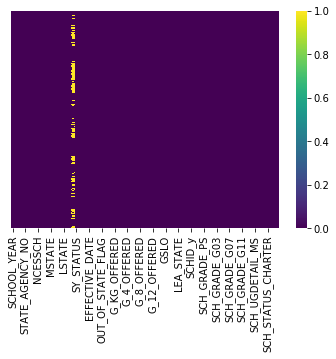

In [31]:
# Use heatmap to determine if there are missing data
sns.heatmap(merged.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [32]:
edge_data = pandas.read_csv('sch_neighborhood_poverty.csv')

In [33]:
edge_data.head()

,NCESSCH,NAME,IPR_EST,IPR_SE
0,10000500870,Albertville Middle School,245,80
1,10000500871,Albertville High School,248,80
2,10000500879,Evans Elementary School,174,91
3,10000500889,Albertville Elementary School,236,105
4,10000501616,Big Spring Lake Kindergarten School,480,120


In [34]:
edge_data['NCESSCH'] = edge_data['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
edge_data.head()

,NCESSCH,NAME,IPR_EST,IPR_SE
0,010000500870,Albertville Middle School,245,80
1,010000500871,Albertville High School,248,80
2,010000500879,Evans Elementary School,174,91
3,010000500889,Albertville Elementary School,236,105
4,010000501616,Big Spring Lake Kindergarten School,480,120


In [35]:
#joining ccd and crdc datasets; using inner join default
merged_1 = merged.merge(edge_data, on='NCESSCH')
merged_1.to_csv("ccd_sch_edge.csv", index=False)

In [36]:
merged_1.head()

,SCHOOL_YEAR,ST,SCH_NAME_x,LEA_NAME_x,STATE_AGENCY_NO,ST_LEAID,LEAID_x,ST_SCHID,NCESSCH,SCHID_x,...,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS,NAME,IPR_EST,IPR_SE
0,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,010000500871,100871,...,-9,No,No,No,No,-9,-9,Albertville High School,248,80
1,2017-2018,AL,Asbury High School,Marshall County,1,AL-048,100006,AL-048-0030,010000600872,100872,...,-9,No,No,No,No,-9,-9,Asbury High School,241,127
2,2017-2018,AL,Douglas High School,Marshall County,1,AL-048,100006,AL-048-0100,010000600878,100878,...,-9,No,No,No,No,-9,-9,Douglas High School,213,51
3,2017-2018,AL,Kate D Smith DAR High School,Marshall County,1,AL-048,100006,AL-048-0140,010000600883,100883,...,-9,No,No,No,No,-9,-9,Kate D Smith DAR High School,254,48
4,2017-2018,AL,Brindlee Mountain High School,Marshall County,1,AL-048,100006,AL-048-0042,010000601585,101585,...,-9,No,No,No,No,-9,-9,Brindlee Mountain High School,329,150


In [37]:
merged_1.shape

(20489, 87)

In [60]:
math_prof_data = pandas.read_csv('math-achievement-sch-sy2017-18.csv')
math_prof_data.head()

C:\Users\dansa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,13,15,17,19,21,23,25,27,29,31,32,33,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,213,215,217,219,221,223,225,227,229,231,233,235,236,237,239,241,243,245,247,249,251,253,254,255,256,257,258,259,260,261,262,263) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,...,NaN,NaN,NaN,NaN,11,GE50,14,GE50,NaN,NaN
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,GE50
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,...,14,LT50,5,PS,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
math_prof_data = math_prof_data[['STNAM','FIPST','LEAID','ST_LEAID','LEANM','NCESSCH','ST_SCHID','SCHNAM','DATE_CUR','ALL_MTH00NUMVALID_1718',
                                 'ALL_MTH00PCTPROF_1718']]
math_prof_data.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,47
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,37
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,37
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,53
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,56


In [62]:
math_prof_data.dtypes

STNAM                      object
FIPST                       int64
LEAID                       int64
ST_LEAID                   object
LEANM                      object
NCESSCH                   float64
ST_SCHID                   object
SCHNAM                     object
DATE_CUR                   object
ALL_MTH00NUMVALID_1718      int64
ALL_MTH00PCTPROF_1718      object
dtype: object

In [57]:
math_prof_data.astype({'NCESSCH': 'float'}).dtypes

STNAM                      object
FIPST                       int64
LEAID                       int64
ST_LEAID                   object
LEANM                      object
NCESSCH                   float64
ST_SCHID                   object
SCHNAM                     object
DATE_CUR                   object
ALL_MTH00NUMVALID_1718      int64
ALL_MTH00PCTPROF_1718      object
dtype: object

In [63]:
math_prof_data.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,47
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,37
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,37
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,53
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,56


In [64]:
#math_prof_data['NCESSCH'] = math_prof_data['NCESSCH'].astype(int) 

In [65]:
math_prof_data['NCESSCH'] = math_prof_data['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
math_prof_data.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,10000500870.0,AL-101-0010,Albertville Middle School,27-Mar-19,802,47
1,ALABAMA,1,100005,AL-101,Albertville City,10000500871.0,AL-101-0020,Albertville High School,27-Mar-19,337,37
2,ALABAMA,1,100005,AL-101,Albertville City,10000500879.0,AL-101-0110,Evans Elementary School,27-Mar-19,851,37
3,ALABAMA,1,100005,AL-101,Albertville City,10000500889.0,AL-101-0200,Albertville Elementary School,27-Mar-19,902,53
4,ALABAMA,1,100006,AL-048,Marshall County,10000600193.0,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,56


In [82]:
math_prof_data.rename(columns = {'ST_SCHID_x':'ST_SCHID'}, inplace = True) 

In [83]:
math_prof_data.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,NAME,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,10000500870.0,AL-101-0010,Albertville Middle School,27-Mar-19,802,47
1,ALABAMA,1,100005,AL-101,Albertville City,10000500871.0,AL-101-0020,Albertville High School,27-Mar-19,337,37
2,ALABAMA,1,100005,AL-101,Albertville City,10000500879.0,AL-101-0110,Evans Elementary School,27-Mar-19,851,37
3,ALABAMA,1,100005,AL-101,Albertville City,10000500889.0,AL-101-0200,Albertville Elementary School,27-Mar-19,902,53
4,ALABAMA,1,100006,AL-048,Marshall County,10000600193.0,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,56


In [84]:
merged_2 = merged_1.merge(math_prof_data, on='ST_SCHID')
merged_2.to_csv("ccd_sch_edge_mathprof.csv", index=False)

In [85]:
merged_2.head()

,SCHOOL_YEAR,ST,SCH_NAME_x,LEA_NAME_x,STATE_AGENCY_NO,ST_LEAID_x,LEAID_x,ST_SCHID,NCESSCH_x,SCHID_x,...,STNAM,FIPST,LEAID,ST_LEAID_y,LEANM,NCESSCH_y,NAME_y,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,010000500871,100871,...,ALABAMA,1,100005,AL-101,Albertville City,10000500871.0,Albertville High School,27-Mar-19,337,37
1,2017-2018,AL,Asbury High School,Marshall County,1,AL-048,100006,AL-048-0030,010000600872,100872,...,ALABAMA,1,100006,AL-048,Marshall County,10000600872.0,Asbury High School,27-Mar-19,327,34
2,2017-2018,AL,Douglas High School,Marshall County,1,AL-048,100006,AL-048-0100,010000600878,100878,...,ALABAMA,1,100006,AL-048,Marshall County,10000600878.0,Douglas High School,27-Mar-19,130,35-39
3,2017-2018,AL,Kate D Smith DAR High School,Marshall County,1,AL-048,100006,AL-048-0140,010000600883,100883,...,ALABAMA,1,100006,AL-048,Marshall County,10000600883.0,Kate D Smith DAR High School,27-Mar-19,106,55-59
4,2017-2018,AL,Brindlee Mountain High School,Marshall County,1,AL-048,100006,AL-048-0042,010000601585,101585,...,ALABAMA,1,100006,AL-048,Marshall County,10000601585.0,Brindlee Mountain High School,27-Mar-19,338,31


In [87]:
merged_2.shape

(18814, 97)

In [88]:
merged_2.describe()

,STATE_AGENCY_NO,LEAID_x,SCHID_x,MZIP,LZIP,SY_STATUS,UPDATED_STATUS,SCH_TYPE,IPR_EST,IPR_SE,FIPST,LEAID,ALL_MTH00NUMVALID_1718
count,18814.0,1.881400e+04,1.881400e+04,18814.000000,18814.000000,18814.000000,18814.000000,18814.000000,18814.000000,18814.000000,18814.000000,1.881400e+04,18814.000000
mean,1.0,2.811116e+06,2.801968e+06,55963.929786,55973.200808,1.021792,1.021792,1.398799,291.210003,71.480600,27.990273,2.811116e+06,208.439673
std,0.0,1.571501e+06,1.571007e+06,27300.210134,27302.278652,0.254348,0.254348,1.003126,141.837008,38.905105,15.711366,1.571501e+06,221.848129
min,1.0,1.000050e+05,1.000030e+05,1001.000000,1001.000000,1.000000,1.000000,1.000000,48.000000,2.000000,1.000000,1.000050e+05,1.000000
25%,1.0,1.303098e+06,1.302524e+06,34605.250000,34609.250000,1.000000,1.000000,1.000000,199.000000,42.000000,13.000000,1.303098e+06,50.000000
50%,1.0,2.741895e+06,2.704820e+06,56345.000000,56345.000000,1.000000,1.000000,1.000000,260.000000,63.000000,27.000000,2.741895e+06,135.000000
75%,1.0,4.100048e+06,4.100161e+06,78341.750000,78388.500000,1.000000,1.000000,1.000000,341.000000,92.000000,41.000000,4.100048e+06,300.000000
max,1.0,5.606240e+06,5.600580e+06,99929.000000,99929.000000,8.000000,8.000000,4.000000,980.000000,396.000000,56.000000,5.606240e+06,2274.000000


In [179]:
jupyter nbconvert --to script *.ipynb

SyntaxError: invalid syntax (<ipython-input-179-22ea5a9be3e7>, line 1)

In [ ]:
!jupyter nbconvert --to script Phase_1.ipynb